# Task 4.

Цели работы:
    
Научиться моделировать такие временные ряды с помощью нейросетевых моделей, как AR, AR(X). 

Найти достаточное количество скрытых слоев и количество нейронов в сети для обучения в задачах аппроксимации математических функций.

Произвести оценку полученных результатов на тестовой выборке.




# AR - модель:
         
$y_{t-1}$ $\rightarrow$ $\quad$   |  $\quad$нейронная $\quad$ |

$y_{t-2}$ $\rightarrow$ $\quad$   |$\quad$ $\quad$   сеть $\quad$$\quad$   | $\rightarrow$ $\quad$ $y_t$

$y_{t-3}$ $\rightarrow$ $\quad$   |$\quad $$\quad$ $\quad$$\quad$$\quad$$\quad$|   



# Задание 1.

Реализовать и протестировать AR-модель на функции sin(x/2).


In [29]:
import os
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
 
import tensorflow as tf

class DenseNN(tf.Module):
    def __init__(self, outputs, actf):
        super().__init__()
        self.outputs = outputs
        self.fl_init = False
        self.actf = actf
 
    def __call__(self, x):
        if not self.fl_init:
            # Check why up and equal use Bias with a varying size
            # Up and Equal should be the same
            self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name="w")
            self.w2 = tf.random.truncated_normal((1, self.outputs), stddev=0.1, name="w2")
                
            self.w = tf.Variable(self.w)
            self.w2 = tf.Variable(self.w2)
 
            self.fl_init = True
    
        
        if self.actf == "summ":
             y = x @ self.w + self.w2
             y = tf.reduce_sum(y)  
             return y
    
        elif self.actf == "sig":
             y = x @ self.w + self.w2
             y = tf.nn.sigmoid(y)
             return y

In [30]:
import math
import matplotlib.pyplot as plt

l1 = DenseNN(3, actf="sig")
l2 = DenseNN(35, actf="sig")
l3 = DenseNN(35, actf="sig")
l4 = DenseNN(35, actf="sig")
lf = DenseNN(1, actf="summ")

def model(x):
    y = l1(x)
    y = l2(y)
    y = l3(y)
    y = l4(y)
    y = lf(y)
    return y

x_train = []
y_train = []

# evenly spaced numbers between 0 and 4P, 16 numbers in between
# create a trining set
a = np.linspace(0, 4*3.14, 32, dtype='f')
for i in range(len(a)-3):
    # calculate three points
    a1 = tf.math.sin(a[i]/2)
    a1 = tf.cast(a1, dtype=float)
    a2 = tf.math.sin(a[i+1]/2)
    a2 = tf.cast(a2, dtype=float)
    a3 = tf.math.sin(a[i+2]/2)
    a3 = tf.cast(a3, dtype=float)
    
    aa = a1, a2, a3
    aa = tf.cast(aa, dtype=tf.float32)
    x_train.append(aa)
    yy = tf.math.sin(a[i+3]/2)
    yy = tf.cast(yy, dtype=tf.float32)
    y_train.append(yy)

## loss function
loss = lambda x, y: tf.reduce_mean(tf.square(x - y))
# optimized algo Adam
opt = tf.optimizers.Adam(learning_rate=0.01)

EPOCHS = 250
for n in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.expand_dims(x, axis=0)
        y = tf.constant(y, shape=(1, 1))
 
        with tf.GradientTape() as tape:
            f_loss = loss(y, model(x))
 
        grads = tape.gradient(f_loss, [l1.trainable_variables, l2.trainable_variables, l3.trainable_variables, l4.trainable_variables])
    
        opt.apply_gradients(zip(grads[0], l1.trainable_variables))
        opt.apply_gradients(zip(grads[1], l2.trainable_variables))
        opt.apply_gradients(zip(grads[2], l3.trainable_variables))
        opt.apply_gradients(zip(grads[3], l4.trainable_variables))

print(f_loss)

tf.Tensor(0.00012377085, shape=(), dtype=float32)


[<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.        , 0.20119788, 0.394167  ], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.20119788, 0.394167  , 0.5710152 ], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.394167  , 0.5710152 , 0.72450954], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5710152 , 0.72450954, 0.8483724 ], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.72450954, 0.8483724 , 0.93753785], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.8483724 , 0.93753785, 0.98835915], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.93753785, 0.98835915, 0.9987578 ], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.98835915, 0.9987578 , 0.9683085 ], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.9987578, 0.9683085, 0.8982566], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=arr

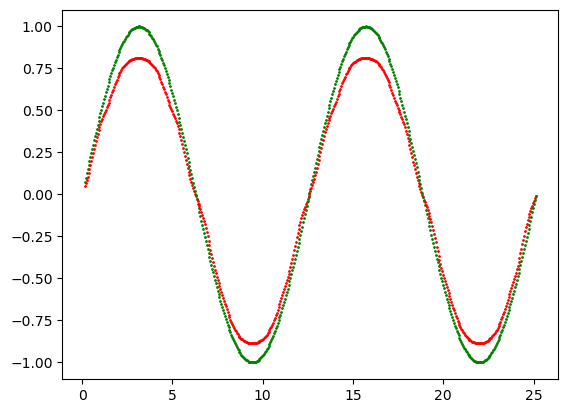

In [31]:
import numpy as np

print(x_train)
print(y_train)

# 500 points between 0 and 8P
a = np.linspace(0, 8*3.14, 500)
for i in range(len(a)-3):
    plt.scatter(a[i+3], model([[tf.math.sin(a[i]/2), tf.math.sin(a[i+1]/2), tf.math.sin(a[i+2]/2)]]), s = 1, c = 'r')
    plt.scatter(a[i+3], tf.math.sin(a[i+3]/2), s = 1, c = 'g')

В данной лабораторной работе была построена AR (autoregressive) модель нейросети, которая предсказывает направление графика на основе трёх предыдущих точек. Однако, при резких изменениях она недооценивает изменение графика. Модель оптимизируется методом градиентного спуска с оптимизатором Adam. Используются три скрытых слоя по 35 нейронов, обучение производится в 250 эпох на 32 точках с learning rate 0.01. При увеличении числа нейронов и/или эпох коэффициенты в нейронах будут расходиться и давать значения с большей амплитудой, приближая синус к 1.